    Copyright(c) 2022-
    Author: Chaitanya Tejaswi (github.com/CRTejaswi)    License: GPLv3.0+

# MicroMagnetic Simulation: Visualising Energies 

Here, we simulate/visualise energies associated with magnetic phenomena.

A __system__ is simulated by considering __energies (energy densitites__), __dynamics__, and an __initial magnetic configuration__.

- Zeeman Energy
- Easy-Axis Anisotropy
- Easy-Plane Anisotropy
- Cubic Anisotropy
- Bulk DMI
- Interfacial DMI
- Exchange Energy
- Exchange Zeeman Energy
- Exchange Anisotropy
- Exchange DMI

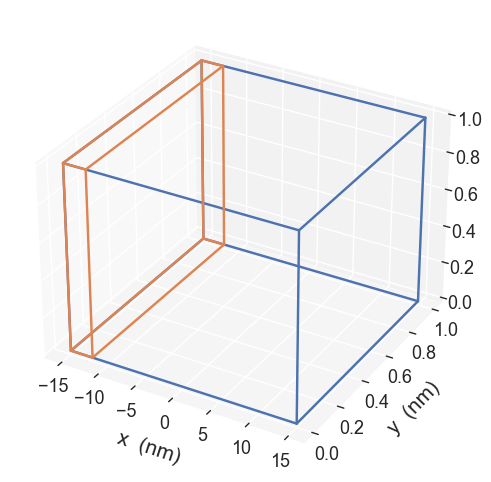

In [1]:
import os
import k3d
import random
import discretisedfield as df
import micromagneticmodel as mm
import micromagneticdata as md
import oommfc as mc
docker_runner = mc.oommf.DockerOOMMFRunner(image='oommf/oommf')

# Regions: 30nm x 1nm x 1nm
p1, p2 = (-15e-9, 0, 0), (15e-9, 1e-9, 1e-9)
n = (10, 1, 1)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)
mesh.plane('z').mpl()

# Magnetization
Ms = 1e6
random.seed(2)
def value_random(point):
    m = [random.random()*2 - 1 for i in range(3)]
    return m

## Zeeman Energy

In [2]:
# System
H = (0, 0, 1e6)
system = mm.System(name='zeeman')
system.energy = mm.Zeeman(H=H)
system.dynamics = mm.Damping(alpha=0.5)  # No precession for faster make animations
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
driver.drive(system, t=70e-12, n=250)  # 10s video n=10*25=250

# Plot a sequence of samples 
data  = md.Data(system.name)
drive = data[-1]
# drive.ovf2vtk()

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

Running OOMMF (DockerOOMMFRunner)[2022/11/14 12:43]... (6.9 s)


interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Easy-Axis Anisotropy

In [3]:
u = (0, 0, 1)
K = 7e5

system = mm.System(name='easyaxis_anisotropy')
system.energy = mm.UniaxialAnisotropy(K=K, u=u)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Easy-Plane Anisotropy

In [4]:
u = (0, 0, 1)
K = -5e5

system = mm.System(name='easyplane_anisotropy')
system.energy = mm.UniaxialAnisotropy(K=K, u=u)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Cubic Anisotropy

In [5]:
u1,u2 = (1, 0, 0), (0, 1, 0)
K = 7e5

system = mm.System(name='cubic_anisotropy')
system.energy = mm.CubicAnisotropy(K=K, u1=u1, u2=u2)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Bulk DMI

In [6]:
D = 2e-2

system = mm.System(name='dmi_bulk')
system.energy = mm.DMI(D=D, crystalclass='T')
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Interfacial DMI

In [7]:
D = 1e-2

system = mm.System(name='dmi_interfacial')
system.energy = mm.DMI(D=D, crystalclass='Cnv')
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

driver = mc.TimeDriver()
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

interactive(children=(IntSlider(value=0, description='step', max=249), Output()), _dom_classes=('widget-intera…

Output()

## Exchange Energy

In [8]:
A = 5e-11
H = (5e4, 0, 5e4)  # just to speed up simulations

system = mm.System(name='exchange')
system.energy = mm.Exchange(A=A) + mm.Zeeman(H=H)

driver = mc.TimeDriver()
driver.drive(system, t=70e-12, n=250)  # 10s video n=10*25=250

# Plot a sequence of samples 
data  = md.Data(system.name)
drive = data[-1]
# drive.ovf2vtk()

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

AttributeError: 'NoneType' object has no attribute 'mesh'

## Exchange + Zeeman

In [ ]:
A = 1e-10
H = (0, 0, 1e6)

system = mm.System(name='exchange_zeeman')
system.energy = mm.Exchange(A=A) + mm.Zeeman(H=H)

driver = mc.TimeDriver()
driver.drive(system, t=70e-12, n=250)  # 10s video n=10*25=250

# Plot a sequence of samples 
data  = md.Data(system.name)
drive = data[-1]
# drive.ovf2vtk()

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

## Exchange + Anisotropy

In [ ]:
A = 8e-12
K = 3e5
u = (0, 0, 1)

def _m(point):
    x, y, z = point
    
    if x < 0:
        return (0, 0.1, -1)
    else:
        return (0, 0.1, 1)

system = mm.System(name='exchange_anisotropy')
system.energy = mm.Exchange(A=A) + mm.UniaxialAnisotropy(K=K, u=u)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=_m, norm=Ms)

driver = mc.TimeDriver()
driver.drive(system, t=70e-12, n=250)  # 10s video n=10*25=250

# Plot a sequence of samples 
data  = md.Data(system.name)
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()

## Exchange + DMI

In [ ]:
D = 2e-3
A = 4.77e-12

system = mm.System(name='exchange_anisotropy')
system.energy = mm.Exchange(A=A) + mm.UniaxialAnisotropy(K=K, u=u)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=_m, norm=Ms)

driver = mc.TimeDriver()
driver.drive(system, t=70e-12, n=250)  # 10s video n=10*25=250

# Plot a sequence of samples 
data  = md.Data(system.name)
drive = data[-1]

plot = k3d.plot()
@df.interact(nstep = drive.slider())
def systemplot(nstep):
    drive[nstep].plane('z').mpl()
    drive[nstep].plane('z').orientation.k3d.vector(plot=plot, interactive_field=system.m, head_size=2)
plot.display()